# Netflix Dataset Exploratory Data Analysis (EDA)

This repository contains an in-depth Exploratory Data Analysis (EDA) of a Netflix dataset, focusing on various aspects such as movie genres, runtime, IMDb scores, languages, and release dates. The analysis is designed to demonstrate advanced data manipulation, statistical analysis, and data visualization techniques using Python libraries including Pandas, Matplotlib, Seaborn, and Plotly.

The dataset available on [Kaggle](https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores).



# This colab notebooks cover this question:




1.   How does the distribution of IMDb scores differ across various genres?

2.   What is the trend of movie releases over the years?

3. What is the distribution of movie runtimes across different languages?

4. Which genres have the most movies with IMDb scores above 8.0?

5. What is the relationship between runtime and IMDb score across different genres?

6. What are the top 5 genres by average IMDb score?

7. How many movies were released in each genre each year?

8. Which language has the highest average IMDb score, and which has the lowest?

9. How has the average runtime of movies changed over the years?

10. What is the distribution of movie releases across different months?

11. Which genres are most common in each language?

12. What are the top 10 movies with the highest IMDb scores for each year?

13. Is there a seasonal pattern in the release dates of high IMDb-rated movies?

14. How does the number of genres a movie falls into affect its IMDb score?

15. Which genres have shown the most growth in terms of the number of movies produced over the past decade?







In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [11]:
dataset = pd.read_csv('NetflixOriginals.csv', encoding = "ISO-8859-1")
dataset.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [12]:
dataset.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [13]:
dataset.isnull().sum()


,0
Title,0
Genre,0
Premiere,0
Runtime,0
IMDB Score,0
Language,0


In [17]:
dataset['Premiere'] = pd.to_datetime(dataset['Premiere'], format='mixed', errors='coerce')

# columns year, month and weekday
dataset['year']    = dataset['Premiere'].dt.year
dataset['month']   = dataset['Premiere'].dt.month_name()
dataset['weekday'] = dataset['Premiere'].dt.day_name()


dataset.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year,month,weekday
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019,August,Monday
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020,August,Friday
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019,December,Thursday
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018,January,Friday
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020,October,Friday


# How Do IMDb Scores Distribute Across the Top 10 Most Popular Genres on Netflix?

In [22]:
top_genres = dataset['Genre'].value_counts().head(15).index
top_genres_data = dataset[dataset['Genre'].isin(top_genres)]


<ipython-input-24-c0c83266f563>:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='IMDB Score', y='Genre', data=top_genres_data, inner='quartile', scale='width')


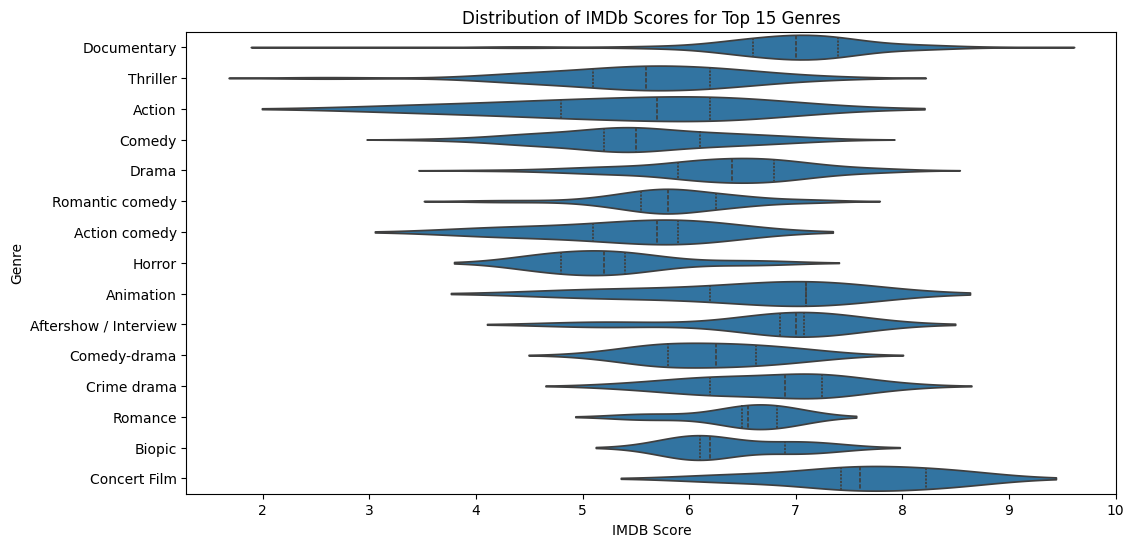

In [24]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='IMDB Score', y='Genre', data=top_genres_data, inner='quartile', scale='width')
plt.title('Distribution of IMDb Scores for Top 15 Genres')
plt.show()


# "How Has the Number of Netflix Movie Releases Evolved Over the Years?"



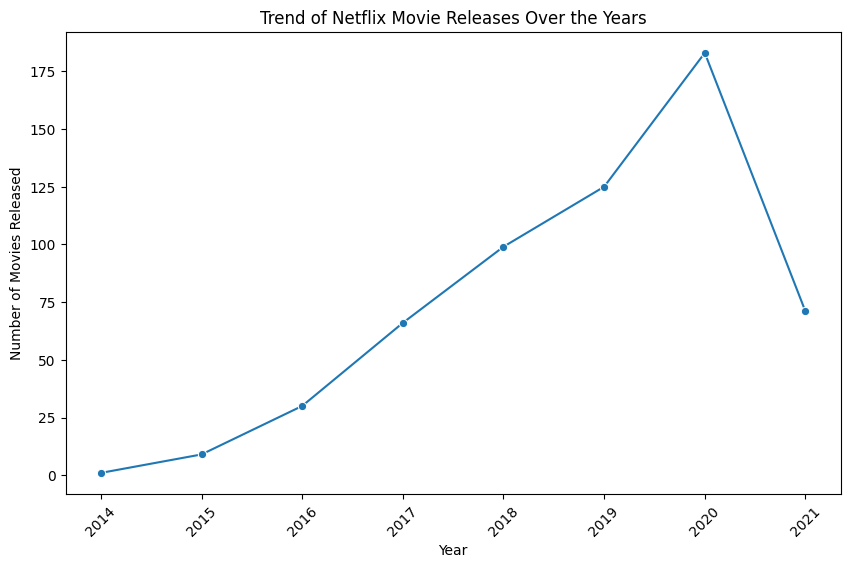

In [25]:
movie_releases_by_year = dataset.groupby('year').size().reset_index(name='Number of Movies')
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='Number of Movies', data=movie_releases_by_year, marker='o')
plt.title('Trend of Netflix Movie Releases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.xticks(rotation=45)
plt.show()


# Distribution of Movie Runtimes for Top 15 Languages

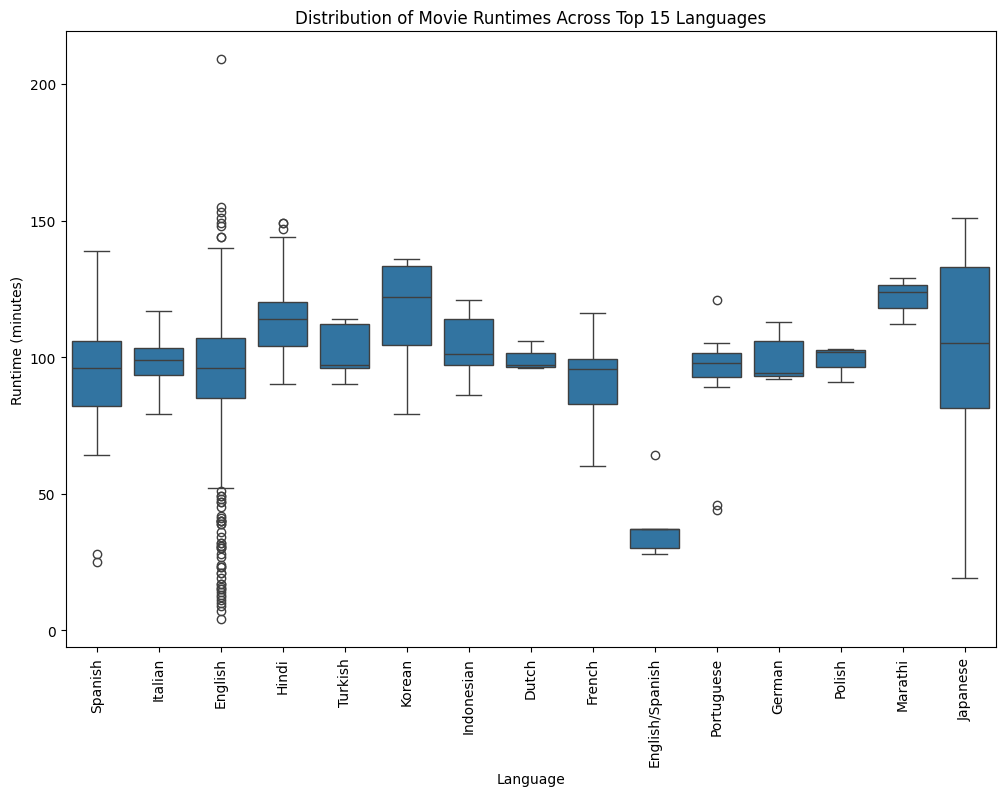

In [28]:
top_languages = dataset['Language'].value_counts().nlargest(15).index
filtered_data = dataset[dataset['Language'].isin(top_languages)]

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Language', y='Runtime', data=filtered_data)
plt.title('Distribution of Movie Runtimes Across Top 15 Languages')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Language')
plt.ylabel('Runtime (minutes)')
plt.show()

# Genres with Most Movies Having IMDb Scores Above 8.0

<ipython-input-30-a5b337184a39>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_score_movies['Genre'] = high_score_movies['Genre'].str.split(',').apply(lambda x: [genre.strip() for genre in x])


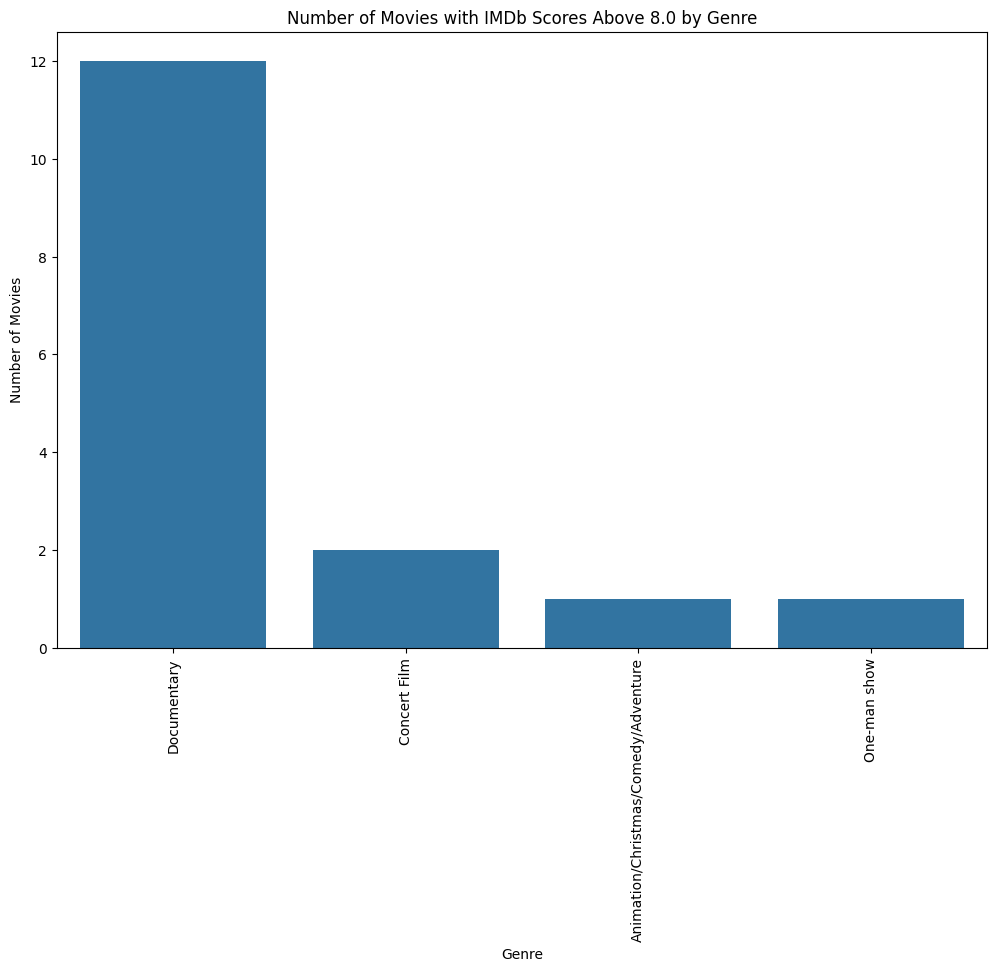

In [30]:
high_score_movies = dataset[dataset['IMDB Score'] > 8.0]

# Split genres and count occurrences
high_score_movies['Genre'] = high_score_movies['Genre'].str.split(',').apply(lambda x: [genre.strip() for genre in x])
high_score_movies = high_score_movies.explode('Genre')

# Count movies per genre
genre_counts = high_score_movies['Genre'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Number of Movies with IMDb Scores Above 8.0 by Genre')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

# "Relationship Between Runtime and IMDb Score Across Different Genres"



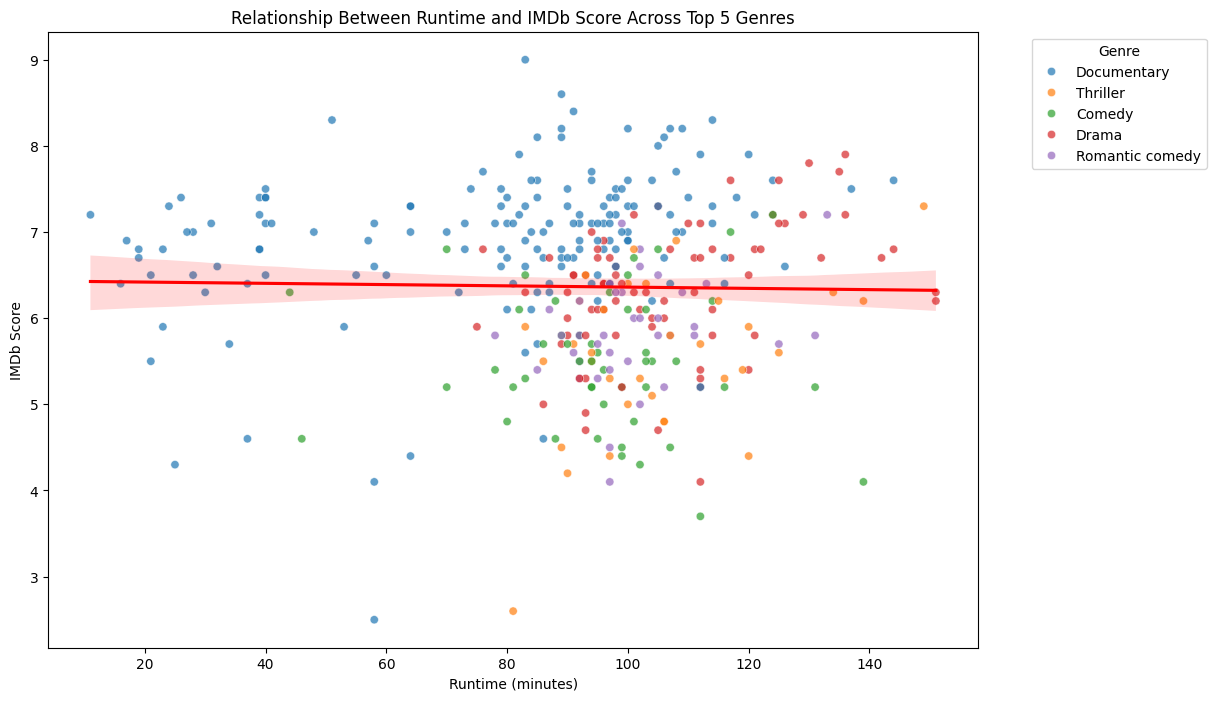

In [33]:
top_genres = dataset['Genre'].value_counts().nlargest(5).index
filtered_data = dataset[dataset['Genre'].isin(top_genres)]

# Create a scatter plot with regression line
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Runtime', y='IMDB Score', hue='Genre', data=filtered_data, palette='tab10', alpha=0.7)
sns.regplot(x='Runtime', y='IMDB Score', data=filtered_data, scatter=False, color='gray', line_kws={"color":"red"})
plt.title('Relationship Between Runtime and IMDb Score Across Top 5 Genres')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Score')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Movies Released in Each Genre by Year



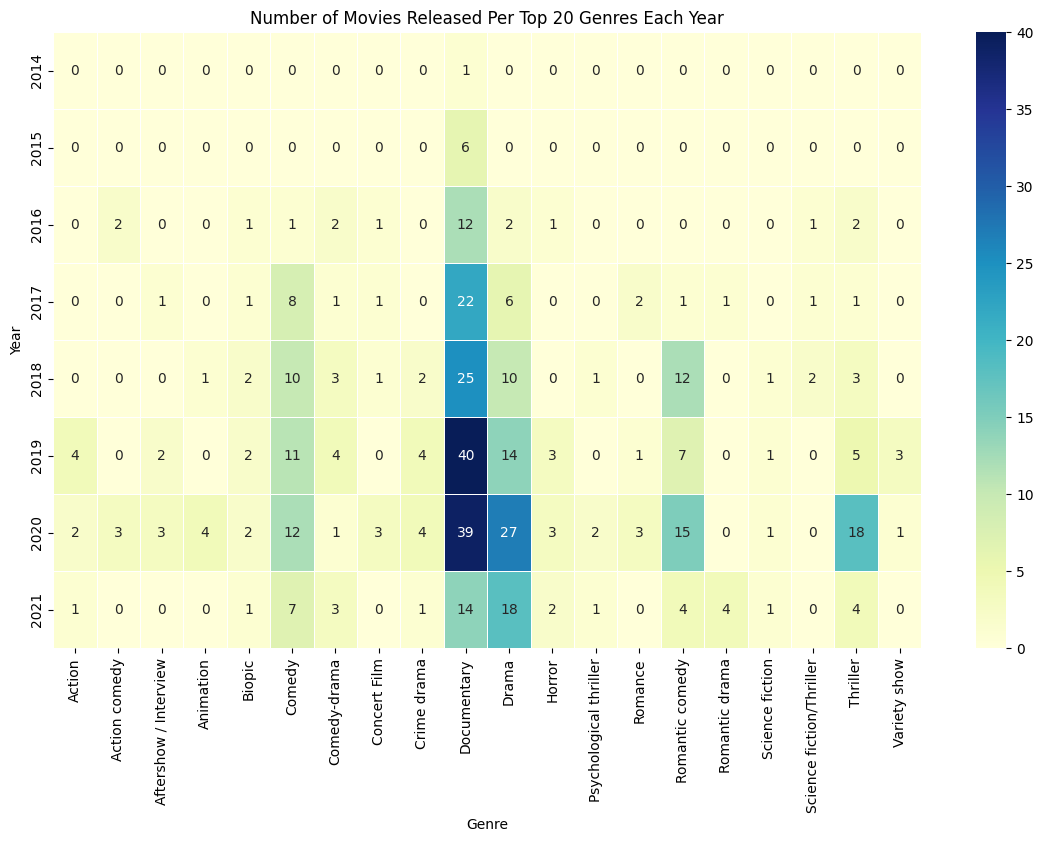

In [36]:
top_20_genres = dataset['Genre'].value_counts().nlargest(20).index

# Filter the dataset to include only the top 20 genres
filtered_data = dataset[dataset['Genre'].isin(top_20_genres)]

# Group data by year and genre, then count the number of movies
movies_per_year_genre = filtered_data.groupby(['Year', 'Genre']).size().unstack().fillna(0)

# Create a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(movies_per_year_genre, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5)
plt.title('Number of Movies Released Per Top 20 Genres Each Year')
plt.xlabel('Genre')
plt.ylabel('Year')
plt.show()

# Languages with the Highest and Lowest Average IMDB Scores








<ipython-input-37-9a52f89e5424>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bottom_languages.values, y=top_bottom_languages.index, palette='coolwarm')


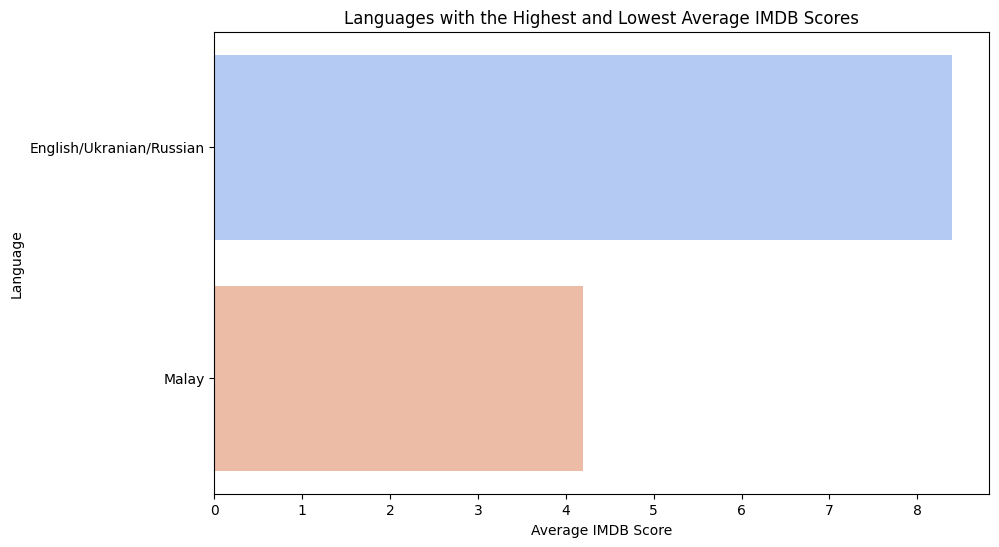

The language with the highest average IMDB score is English/Ukranian/Russian with a score of 8.40
The language with the lowest average IMDB score is Malay with a score of 4.20


In [37]:
# Calculate the average IMDB score for each language
language_avg_scores = dataset.groupby('Language')['IMDB Score'].mean()

# Identify the language with the highest and lowest average IMDB score
highest_avg_score = language_avg_scores.idxmax()
lowest_avg_score = language_avg_scores.idxmin()

# Filter the top and bottom languages
top_bottom_languages = language_avg_scores.loc[[highest_avg_score, lowest_avg_score]]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_bottom_languages.values, y=top_bottom_languages.index, palette='coolwarm')
plt.title('Languages with the Highest and Lowest Average IMDB Scores')
plt.xlabel('Average IMDB Score')
plt.ylabel('Language')
plt.show()

# Display the languages with their scores
print(f"The language with the highest average IMDB score is {highest_avg_score} with a score of {language_avg_scores.max():.2f}")
print(f"The language with the lowest average IMDB score is {lowest_avg_score} with a score of {language_avg_scores.min():.2f}")


# Trend of Average Movie Runtime Over the Years



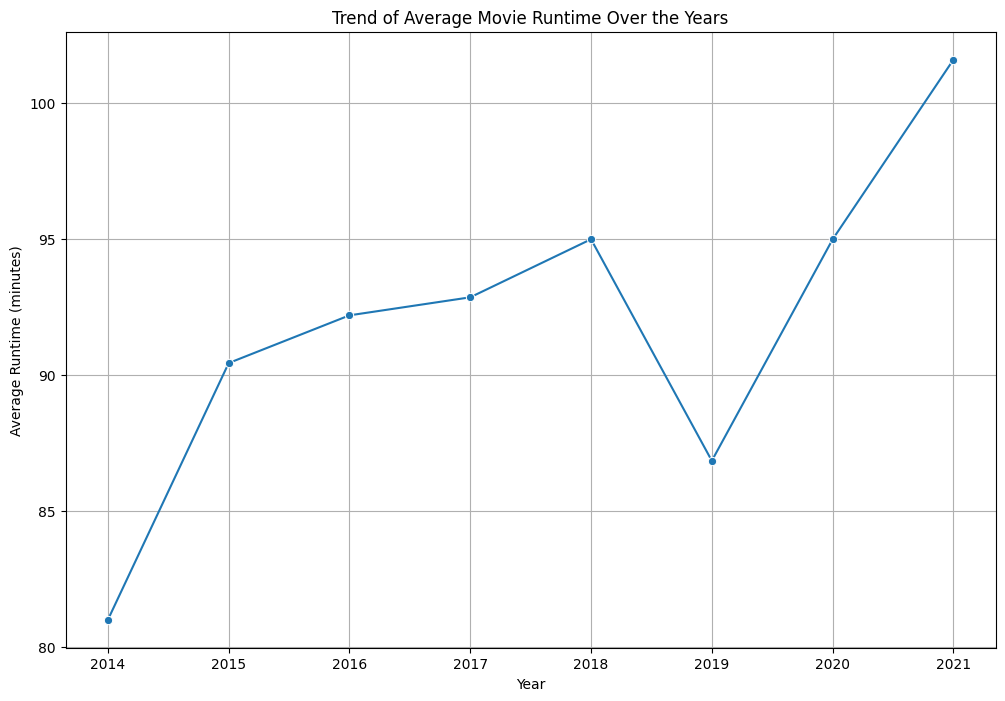

In [38]:
# Calculate average runtime per year
avg_runtime_per_year = dataset.groupby('Year')['Runtime'].mean()

# Create a line plot
plt.figure(figsize=(12, 8))
sns.lineplot(x=avg_runtime_per_year.index, y=avg_runtime_per_year.values, marker='o')
plt.title('Trend of Average Movie Runtime Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Runtime (minutes)')
plt.grid(True)
plt.show()


# What is the distribution of movie releases across different months?



<ipython-input-39-75285cb0012e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month', data=dataset, order=dataset['month'].value_counts().index, palette='viridis')


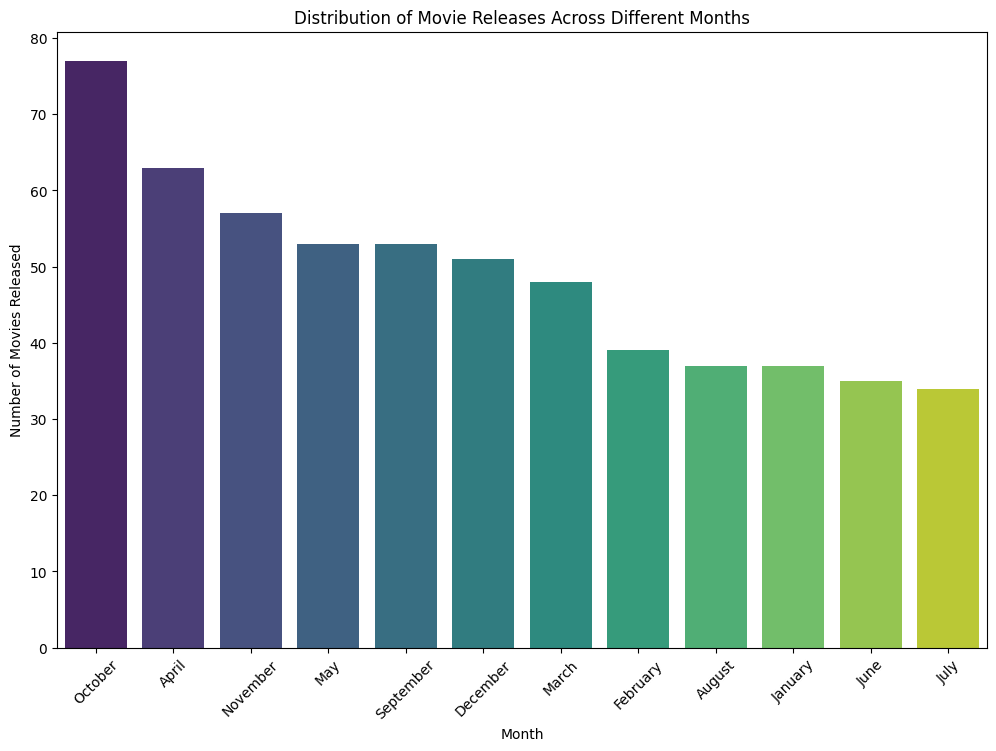

In [39]:
# Distribution of movie releases across different months
plt.figure(figsize=(12, 8))
sns.countplot(x='month', data=dataset, order=dataset['month'].value_counts().index, palette='viridis')
plt.title('Distribution of Movie Releases Across Different Months')
plt.xlabel('Month')
plt.ylabel('Number of Movies Released')
plt.xticks(rotation=45)
plt.show()


# Which genres are most common in each of the top 15 languages?





<Figure size 1400x1000 with 0 Axes>

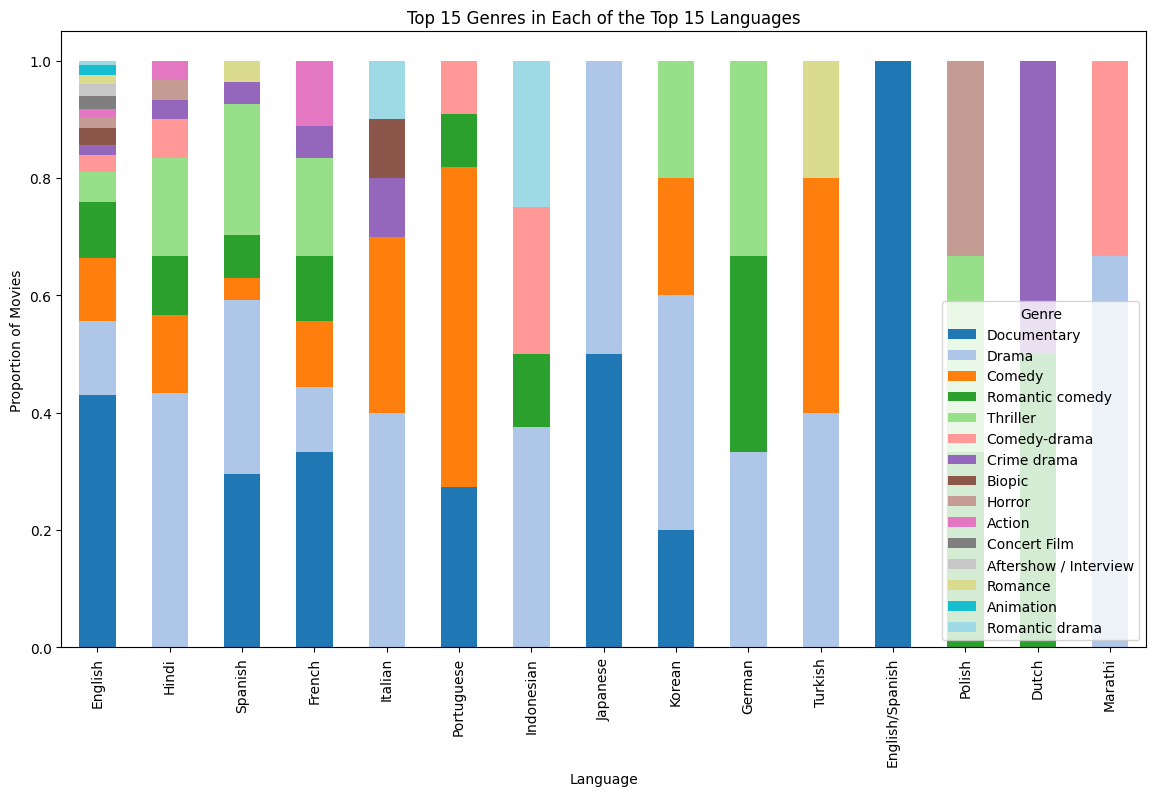

In [42]:
# Identify the top 15 languages by frequency
top_15_languages = dataset['Language'].value_counts().nlargest(15).index

# Filter the dataset to include only the top 15 languages
filtered_data = dataset[dataset['Language'].isin(top_15_languages)]

# Identify the top 15 genres by frequency within the filtered dataset
top_15_genres = filtered_data['Genre'].value_counts().nlargest(15).index

# Further filter the dataset to include only the top 15 genres
filtered_data = filtered_data[filtered_data['Genre'].isin(top_15_genres)]

# Create a stacked bar chart for the distribution of the top 15 genres within each of the top 15 languages
plt.figure(figsize=(14, 10))
genre_language_dist = pd.crosstab(index=filtered_data['Language'], columns=filtered_data['Genre'])
genre_language_dist = genre_language_dist.loc[top_15_languages, top_15_genres]  # Ensure only top 15 genres are plotted
genre_language_dist.div(genre_language_dist.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))
plt.title('Top 15 Genres in Each of the Top 15 Languages')
plt.xlabel('Language')
plt.ylabel('Proportion of Movies')
plt.xticks(rotation=90)
plt.show()


# What are the top 5 movies with the highest IMDB scores for each year?



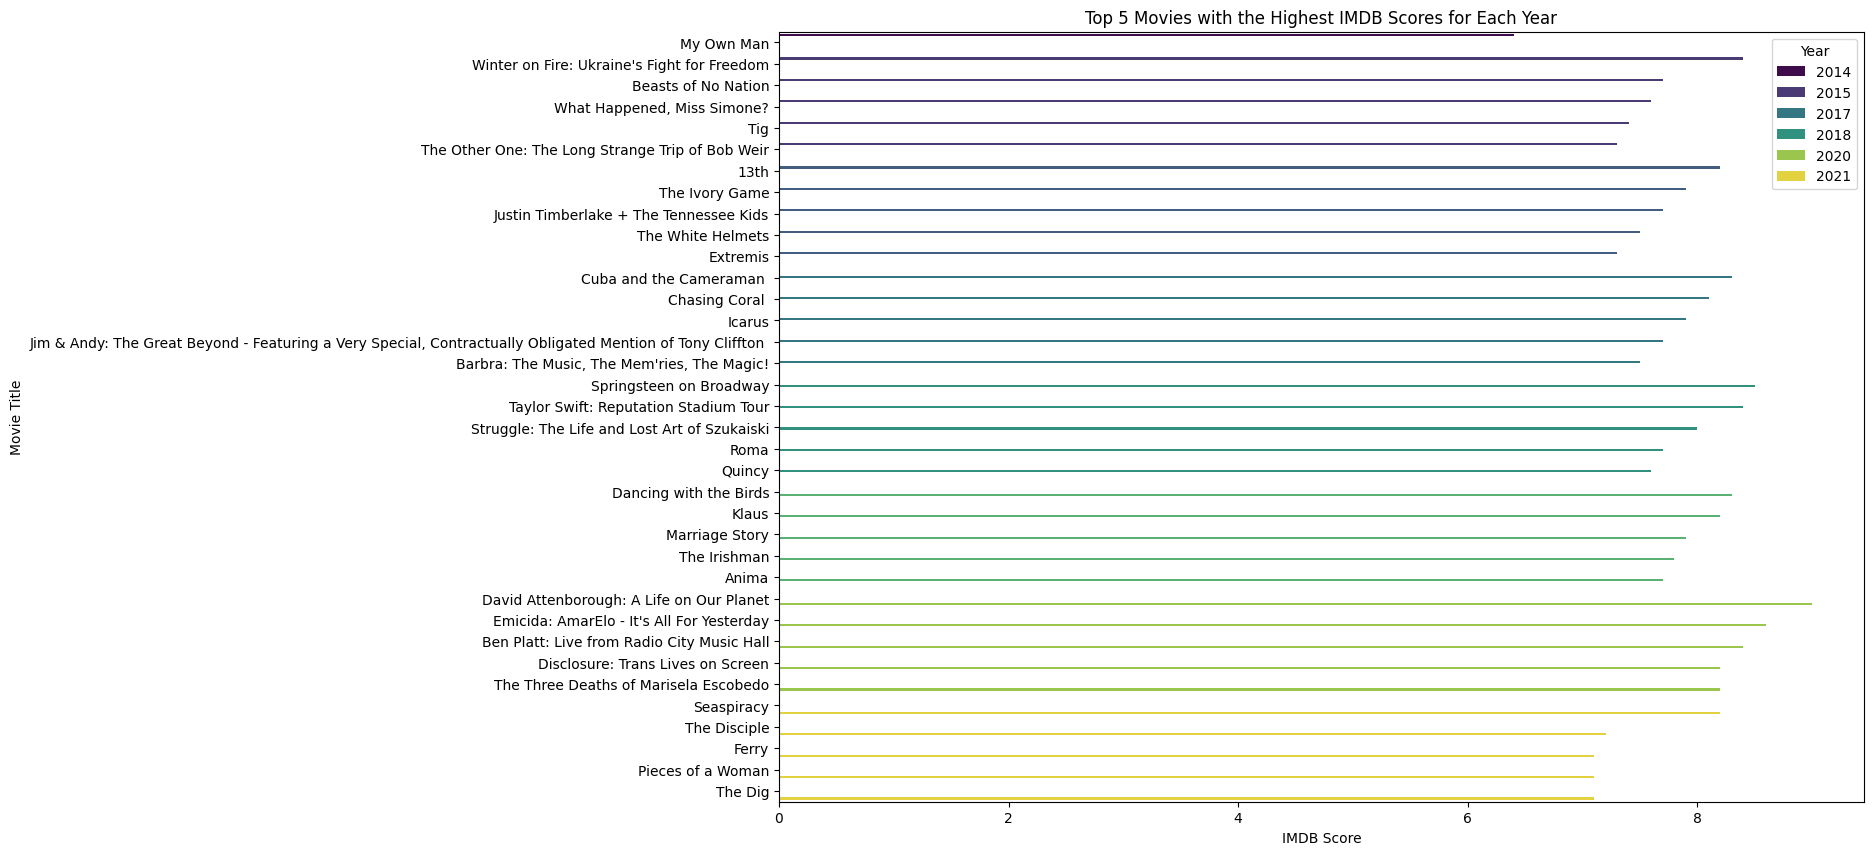

In [46]:
# Get the top 5 movies with the highest IMDB scores for each year
top_5_movies_per_year = dataset.groupby('Year').apply(lambda x: x.nlargest(5, 'IMDB Score')).reset_index(drop=True)

# Create a bar plot for the top 10 movies per year
plt.figure(figsize=(14, 10))
sns.barplot(x='IMDB Score', y='Title', data=top_5_movies_per_year, hue='Year', dodge=True, palette='viridis', linewidth=5.5)
plt.title('Top 5 Movies with the Highest IMDB Scores for Each Year')
plt.xlabel('IMDB Score')
plt.ylabel('Movie Title')
plt.legend(title='Year')
plt.show()


# Is there a seasonal pattern in the release dates of high IMDB-rated movies?

<ipython-input-47-2263e1d6da43>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='IMDB Score', data=high_imdb_movies, palette='coolwarm')


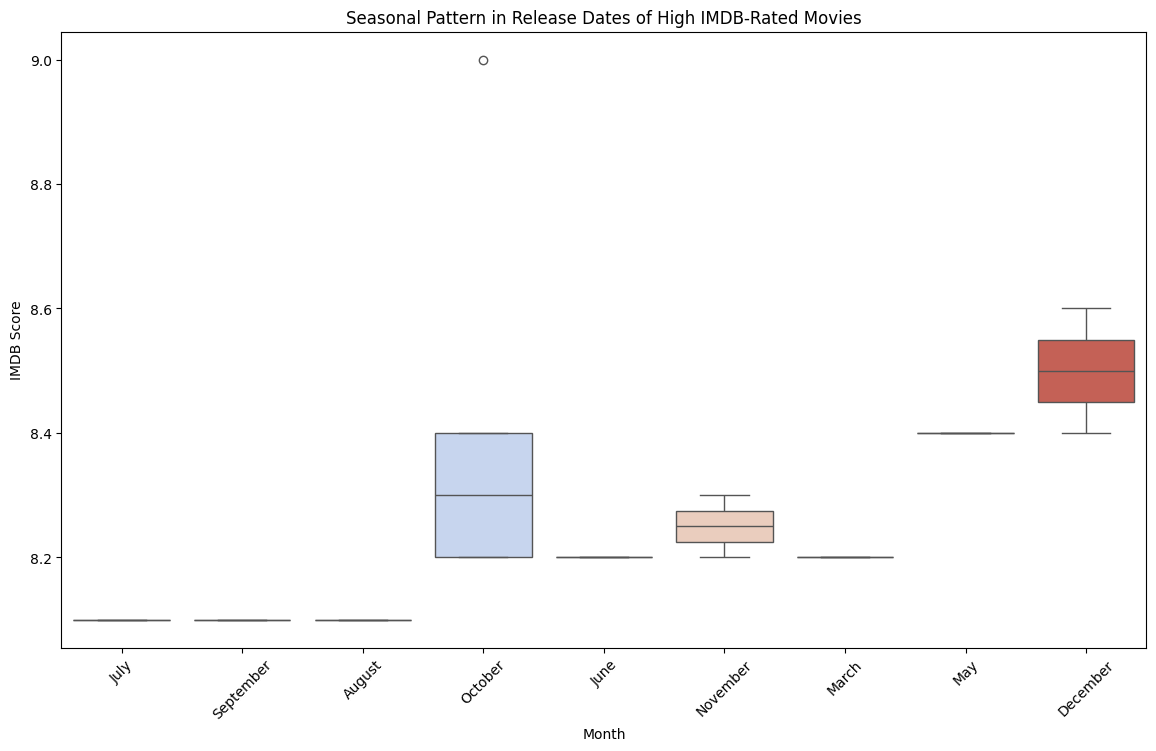

In [47]:
# Filter the dataset for high IMDB-rated movies (e.g., IMDB Score > 8.0)
high_imdb_movies = dataset[dataset['IMDB Score'] > 8.0]

# Create a boxplot to show seasonal patterns in release dates
plt.figure(figsize=(14, 8))
sns.boxplot(x='month', y='IMDB Score', data=high_imdb_movies, palette='coolwarm')
plt.title('Seasonal Pattern in Release Dates of High IMDB-Rated Movies')
plt.xlabel('Month')
plt.ylabel('IMDB Score')
plt.xticks(rotation=45)
plt.show()


# Which of the top 10 genres have shown the most growth in terms of the number of movies produced over the past decade?

<ipython-input-51-3c014f8bb244>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=growth.index, y=growth.values, palette='viridis')


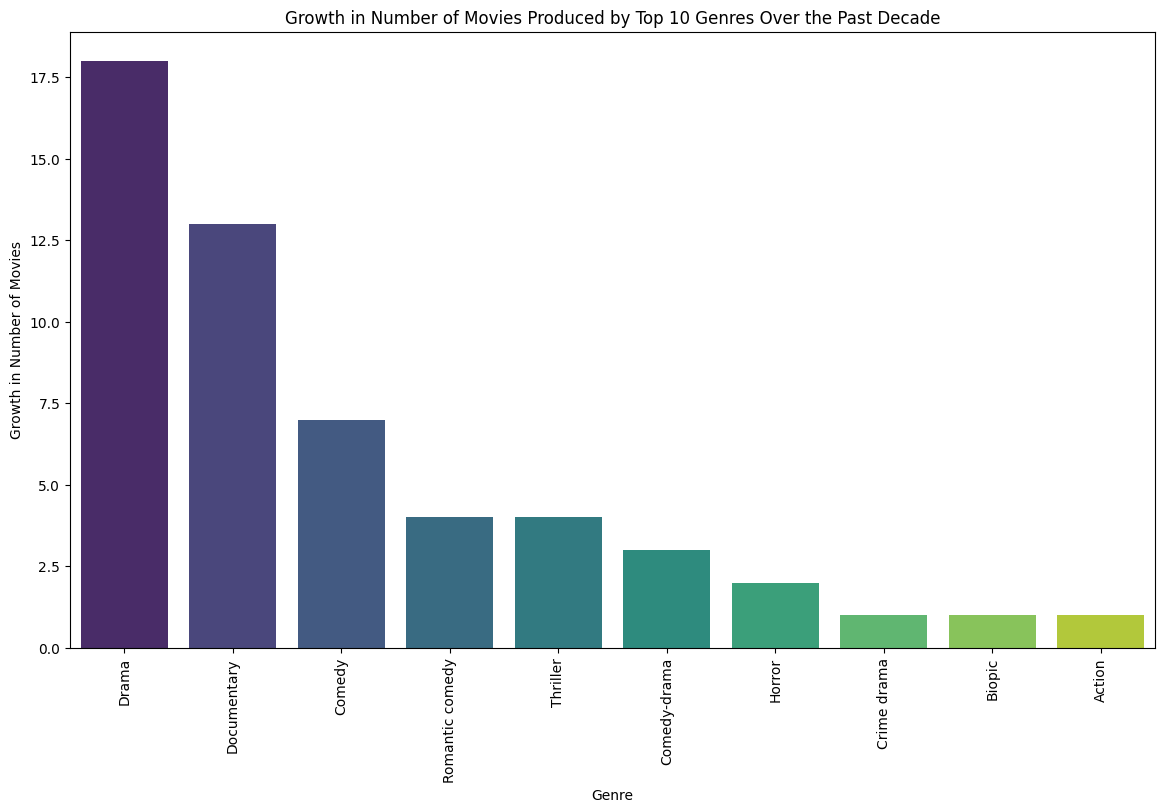

In [51]:
# Filter the dataset to include only the past decade
current_year = pd.Timestamp.now().year
past_decade_data = dataset[dataset['Year'] >= current_year - 10]

# Identify the top 10 genres by frequency
top_10_genres = past_decade_data['Genre'].value_counts().nlargest(10).index

# Filter the dataset to include only the top 10 genres
filtered_data = past_decade_data[past_decade_data['Genre'].isin(top_10_genres)]

# Group data by year and genre, then count the number of movies
movies_per_year_genre = filtered_data.groupby(['Year', 'Genre']).size().unstack().fillna(0)

# Calculate the growth in the number of movies produced for each genre
growth = movies_per_year_genre.diff().sum().loc[top_10_genres].sort_values(ascending=False)

# Create a bar plot to show the growth of the top 10 genres
plt.figure(figsize=(14, 8))
sns.barplot(x=growth.index, y=growth.values, palette='viridis')
plt.title('Growth in Number of Movies Produced by Top 10 Genres Over the Past Decade')
plt.xlabel('Genre')
plt.ylabel('Growth in Number of Movies')
plt.xticks(rotation=90)
plt.show()
